In [1]:
import pandas as pd
import numpy as np

#import data
mortgage = pd.read_csv("mortgage_data.csv")
rate = pd.read_csv("rate.csv")
hpi_state = pd.read_csv("hpi_state.csv")

#caculate interest rate change
rate.shift(12)
rate_diff = (rate - rate.shift(12))[['FRM30_rate','treasury_3mon_rate']]/rate.shift(12)[['FRM30_rate','treasury_3mon_rate']]
rate['FRM30_rate_diff_1year'] = rate_diff['FRM30_rate']
rate['treasury_3mon_rate_diff_1year'] = rate_diff['treasury_3mon_rate']

#mortgage closing day
(pd.to_datetime(mortgage['frst_dte']) -  pd.to_timedelta("45 day")).dt.month 
mortgage_orgi_dte = mortgage.copy()
mortgage_orgi_dte['orig_start_date_year'] = (pd.to_datetime(mortgage['frst_dte']) -  pd.to_timedelta("45 day")).dt.year
mortgage_orgi_dte['orig_start_date_month'] = (pd.to_datetime(mortgage['frst_dte']) -  pd.to_timedelta("45 day")).dt.month
mortgage_orgi_dte  

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,source,loan_id,Year_orig,Quarter_orig,delinquent30,frst_dte,orig_rt,orig_amt,oltv,ocltv,dti,cscore_b,mi_pct,fthb_flg,num_bo,num_unit,state,orig_start_date_year,orig_start_date_month
0,FD,F100Q1023070,2000,1,0,4/1/2000,8.500,204000,79,79,37,643,0,N,2,1,AK,2000,2
1,FD,F100Q1039162,2000,1,0,5/1/2000,8.375,100000,34,34,19,796,0,N,2,1,AK,2000,3
2,FD,F100Q1050054,2000,1,0,3/1/2000,8.500,173000,95,95,43,698,25,N,2,1,AK,2000,1
3,FD,F100Q1002153,2000,1,0,3/1/2000,8.125,137000,80,80,28,716,0,N,2,1,AL,2000,1
4,FD,F100Q1005553,2000,1,0,3/1/2000,8.250,92000,95,95,42,680,30,N,2,1,AL,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295832,FN,611000000000.0,2006,4,1,1/1/2007,6.250,123000,72,72,26,639,0,N,2,1,WY,2006,11
295833,FN,661000000000.0,2006,4,0,12/1/2006,6.000,150000,64,64,45,720,0,Y,2,1,WY,2006,10
295834,FN,665000000000.0,2006,4,1,2/1/2007,6.625,147000,80,90,52,691,0,N,1,1,WY,2006,12
295835,FN,769000000000.0,2006,4,0,12/1/2006,6.250,176000,60,60,13,781,0,N,2,1,WY,2006,10


In [2]:
mortgage_orgi_dte_with_FRM30_rate_treasury_3mon_rate =pd.merge(mortgage_orgi_dte,rate,left_on=['orig_start_date_year','orig_start_date_month'],right_on=['year','month'],how='inner')
mortgage_with_FRM30_rate_treasury_3mon_rate_columns = list(mortgage.columns)+['FRM30_rate','treasury_3mon_rate','FRM30_rate_diff_1year','treasury_3mon_rate_diff_1year']
mortgage_with_FRM30_rate_treasury_3mon_rate = mortgage_orgi_dte_with_FRM30_rate_treasury_3mon_rate[mortgage_with_FRM30_rate_treasury_3mon_rate_columns]
mortgage_with_FRM30_rate_treasury_3mon_rate

,source,loan_id,Year_orig,Quarter_orig,delinquent30,frst_dte,orig_rt,orig_amt,oltv,ocltv,...,cscore_b,mi_pct,fthb_flg,num_bo,num_unit,state,FRM30_rate,treasury_3mon_rate,FRM30_rate_diff_1year,treasury_3mon_rate_diff_1year
0,FD,F100Q1023070,2000,1,0,4/1/2000,8.500,204000,79,79,...,643,0,N,2,1,AK,8.3250,5.55,NaN,NaN
1,FD,F100Q1009604,2000,1,1,4/1/2000,9.500,84000,95,95,...,626,30,N,2,1,AL,8.3250,5.55,NaN,NaN
2,FD,F100Q1010157,2000,1,0,4/1/2000,8.000,170000,80,80,...,797,0,N,1,1,AL,8.3250,5.55,NaN,NaN
3,FD,F100Q1010229,2000,1,1,4/1/2000,8.250,130000,50,50,...,601,0,N,1,1,AL,8.3250,5.55,NaN,NaN
4,FD,F100Q1010242,2000,1,0,4/1/2000,8.000,185000,95,95,...,732,25,N,1,1,AL,8.3250,5.55,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295788,FD,F106Q4273592,2006,4,0,10/1/2007,6.625,284000,80,85,...,672,0,N,2,1,WA,6.5720,4.20,0.007357,-0.153226
295789,FD,F106Q3261660,2006,3,0,12/1/2007,7.250,272000,80,80,...,746,0,N,1,1,TX,6.3750,3.90,0.002753,-0.207317
295790,FD,F106Q4274358,2006,4,0,12/1/2007,6.500,390000,60,60,...,804,0,N,2,1,TN,6.3750,3.90,0.002753,-0.207317
295791,FD,F106Q4274005,2006,4,0,11/1/2007,6.500,190000,76,76,...,718,0,N,2,1,VA,6.3825,3.89,-0.003124,-0.191268


In [3]:
#join mortgage_datan and hpi_state 
hpi_state
hpi_state['HPI_state_diff_1year_percent'] =\
((hpi_state['HPI_state'] - hpi_state.shift(4)['HPI_state'])/hpi_state['HPI_state'].shift(4))
hpi_state['HPI_state_diff_3year_percent'] =\
((hpi_state['HPI_state'] - hpi_state.shift(12)['HPI_state'])/hpi_state['HPI_state'].shift(12))
mortgage_with_FRM30_rate_treasury_3mon_rate_ =\
pd.merge(mortgage_with_FRM30_rate_treasury_3mon_rate,
         hpi_state,
         left_on=['Year_orig','Quarter_orig','state'],
         right_on=['year','quarter','state'],
         how="inner")
mortgage_with_hpi_columns = \
list(mortgage_with_FRM30_rate_treasury_3mon_rate.columns) +\
['HPI_state','HPI_state_diff_1year_percent','HPI_state_diff_3year_percent']
mortgage_with_FRM30_rate_treasury_3mon_rate_hpi =\
mortgage_with_FRM30_rate_treasury_3mon_rate_[mortgage_with_hpi_columns]
mortgage_all = mortgage_with_FRM30_rate_treasury_3mon_rate_hpi.copy()#rename

In [4]:
#convert to the 0/1 variable
mortgage_all['source']=mortgage_all.apply(lambda x:1 if x['source']=="FD" else 0,axis=1)
mortgage_all['fthb_flg']=mortgage_all.apply(lambda x:1 if x['fthb_flg']=="Y" else 0,axis=1)

# delete the missing data 
mortgage_all = mortgage_all.dropna(how="any")

In [5]:
#feature selection
mortgage_all.columns
useful_columns = ['delinquent30','source','frst_dte','orig_rt','orig_amt','oltv','ocltv','dti','cscore_b',
       'mi_pct', 'fthb_flg', 'num_bo', 'num_unit','FRM30_rate','treasury_3mon_rate', 'FRM30_rate_diff_1year',
'treasury_3mon_rate_diff_1year', 'HPI_state','HPI_state_diff_1year_percent', 'HPI_state_diff_3year_percent']
X_columns = ['source','orig_rt','orig_amt','oltv','ocltv','dti','cscore_b',
       'mi_pct', 'fthb_flg', 'num_bo', 'num_unit','FRM30_rate','treasury_3mon_rate', 'FRM30_rate_diff_1year',
'treasury_3mon_rate_diff_1year', 'HPI_state','HPI_state_diff_1year_percent', 'HPI_state_diff_3year_percent']
data = mortgage_all[useful_columns]
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
X = data[X_columns]
y = data.delinquent30

In [6]:
# normalize the distribution of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(X)  
result = scaler.transform(X)
X_ = pd.DataFrame(result,columns=X.columns)

Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.33,random_state=420)

In [8]:
# LASSO
regressor = Lasso(alpha=0.00001,positive=True,fit_intercept=False, max_iter=10000,tol=0.0001)
regressor.fit(Xtrain, Ytrain)
import eli5
eli5.show_weights(regressor, top=-1, feature_names = Xtrain.columns.tolist())

Weight?,Feature
+0.025,HPI_state_diff_3year_percent
+0.011,FRM30_rate_diff_1year
+0.008,orig_rt
+0.003,treasury_3mon_rate_diff_1year
+0.002,mi_pct
+0.001,dti
+0.000,treasury_3mon_rate


In [9]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
features = Xtrain
target = Ytrain
logistic_regression = LogisticRegression(random_state = 0, multi_class="ovr")
model = logistic_regression.fit(features,target)
model.predict(Xtest)
model.predict_proba(Xtest)

array([[0.91178588, 0.08821412],
       [0.9036128 , 0.0963872 ],
       [0.91781711, 0.08218289],
       ...,
       [0.84430217, 0.15569783],
       [0.89504105, 0.10495895],
       [0.85792357, 0.14207643]])

In [12]:
Y_pred = model.predict(Xtest)
print(Y_pred )

[0 0 0 ... 0 0 0]


In [14]:
# confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest.astype(str),Y_pred.astype(str))
print("confusion_matrix", confusion_matrix(Ytest.astype(str),Y_pred.astype(str)))
print("Accuracy", metrics.accuracy_score(Ytest, Y_pred))

confusion_matrix [[71301     8]
 [ 9364     1]]
Accuracy 0.8838287428415599


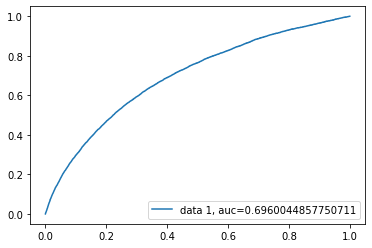

In [15]:
#plot
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
Y_pred_proba = logistic_regression.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(Ytest,  Y_pred_proba)
auc = metrics.roc_auc_score(Ytest, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()